In [1]:
# check my environment (with or without GPU )
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [3]:
# loading training data from keras dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
# function : for preprocessing data ( both x and y)

def preproc_x(x, flatten=True):
    x = (x-x.min()) / (x.max()-x.min())
    x = 2*x - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
print("The maximun of x_train: ",x_train.max())
print("The minimun of x_train: ",x_train.min())

The maximun of x_train:  1.0
The minimun of x_train:  -1.0


In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
# hyperparameters
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 292us/step - loss: 1.6709 - acc: 0.4109 - val_loss: 1.5410 - val_acc: 0.4575
Epoch 2/100
50000/50000 [==============================] - 14s 277us/step - loss: 1.4369 - acc: 0.4954 - val_loss: 1.4449 - val_acc: 0.4880
Epoch 3/100
50000/50000 [==============================] - 14s 275us/step - loss: 1.3201 - acc: 0.5336 - val_loss: 1.3869 - val_acc: 0.5103
Epoch 4/100
50000/50000 [==============================] - 15s 302us/step - loss: 1.2221 - acc: 0.5696 - val_loss: 1.3807 - val_acc: 0.5178
Epoch 5/100
50000/50000 [==============================] - 15s 296us/step - loss: 1.1435 - acc: 0.6001 - val_loss: 1.3967 - val_acc: 0.5182
Epoch 6/100
50000/50000 [==============================] - 14s 275us/step - loss: 1.0644 - acc: 0.6249 - val_loss: 1.3871 - val_acc: 0.5279
Epoch 7/100
50000/50000 [==============================] - 13s

Epoch 57/100
50000/50000 [==============================] - 19s 380us/step - loss: 0.0994 - acc: 0.9674 - val_loss: 4.0150 - val_acc: 0.5210
Epoch 58/100
50000/50000 [==============================] - 13s 260us/step - loss: 0.1001 - acc: 0.9675 - val_loss: 4.0540 - val_acc: 0.5177
Epoch 59/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.1031 - acc: 0.9665 - val_loss: 4.1107 - val_acc: 0.5267
Epoch 60/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.0885 - acc: 0.9717 - val_loss: 4.0829 - val_acc: 0.5214
Epoch 61/100
50000/50000 [==============================] - 13s 251us/step - loss: 0.0937 - acc: 0.9697 - val_loss: 4.0877 - val_acc: 0.5206
Epoch 62/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.0895 - acc: 0.9710 - val_loss: 4.1625 - val_acc: 0.5226
Epoch 63/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.0856 - acc: 0.9721 - val_loss: 4.1081 - val_acc: 0.5225
Epoch 64/100


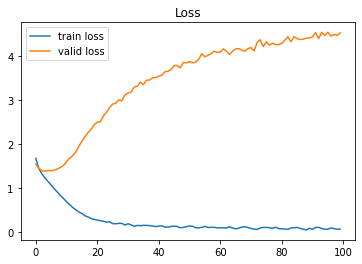

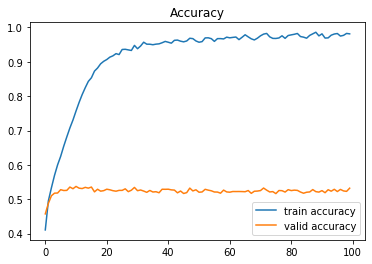

In [13]:
# plotting of the result after training
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
model2 = build_mlp(input_shape=x_train.shape[1:],num_neurons=[512, 256, 128,64,32,16])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [16]:
# hyperparameters
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 402us/step - loss: 1.7864 - acc: 0.3706 - val_loss: 1.5981 - val_acc: 0.4408
Epoch 2/100
50000/50000 [==============================] - 19s 380us/step - loss: 1.5233 - acc: 0.4655 - val_loss: 1.4687 - val_acc: 0.4828
Epoch 3/100
50000/50000 [==============================] - 15s 293us/step - loss: 1.3940 - acc: 0.5097 - val_loss: 1.4062 - val_acc: 0.5104
Epoch 4/100
50000/50000 [==============================] - 13s 262us/step - loss: 1.2983 - acc: 0.5423 - val_loss: 1.4166 - val_acc: 0.5034
Epoch 5/100
50000/50000 [==============================] - 13s 260us/step - loss: 1.2164 - acc: 0.5704 - val_loss: 1.4023 - val_acc: 0.5069
Epoch 6/100
50000/50000 [==============================] - 13s 261us/step - loss: 1.1355 - acc: 0.5999 - val_loss: 1.3901 - val_acc: 0.5176
Epoch 7/100
50000/50000 [==============================] - 13s 261us/step - loss: 1.0600 - acc: 0.6274 - val_l

Epoch 59/100
50000/50000 [==============================] - 13s 257us/step - loss: 0.0958 - acc: 0.9679 - val_loss: 3.7496 - val_acc: 0.5212
Epoch 60/100
50000/50000 [==============================] - 13s 258us/step - loss: 0.1057 - acc: 0.9644 - val_loss: 3.5530 - val_acc: 0.5253
Epoch 61/100
50000/50000 [==============================] - 13s 257us/step - loss: 0.0965 - acc: 0.9678 - val_loss: 3.7234 - val_acc: 0.5235
Epoch 62/100
50000/50000 [==============================] - 13s 258us/step - loss: 0.1089 - acc: 0.9649 - val_loss: 3.6044 - val_acc: 0.5168
Epoch 63/100
50000/50000 [==============================] - 13s 264us/step - loss: 0.1002 - acc: 0.9670 - val_loss: 3.6442 - val_acc: 0.5254
Epoch 64/100
50000/50000 [==============================] - 13s 264us/step - loss: 0.0849 - acc: 0.9723 - val_loss: 3.7162 - val_acc: 0.5275
Epoch 65/100
50000/50000 [==============================] - 13s 260us/step - loss: 0.0906 - acc: 0.9699 - val_loss: 3.7065 - val_acc: 0.5239
Epoch 66/100


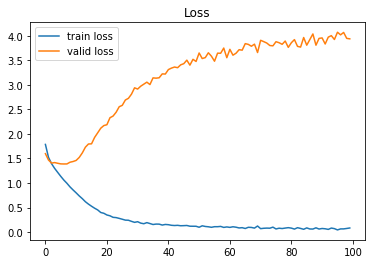

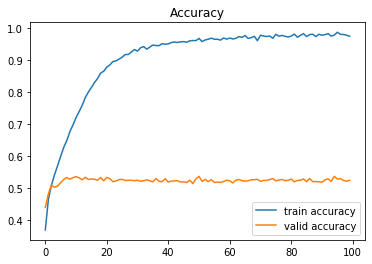

In [18]:
# plotting of the result after training

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()